<a href="https://colab.research.google.com/github/Meghanah97/Playstore_data_analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# “Technology is best when it brings people together.”

The hottest marketing and publicity tool around now is a mobile app, this is because of its numerous benefits. In fact, mobiles apps have become indispensable to businesses of today. Mobile application or mobile apps is a type of application software that have been designed for many purposes for people. Mobile apps can be run in any type of mobile apps, including tablets and smart phones, literally we can get an app in our finger tips without struggling. At present, apps are frequently used by people for many reasons. One of the reasons are to ease their daily life tasks. 

**What we are upto?**\
Exploration namely:Head, tail, summary,data dictionary\
Looking for and handling NaN/Null/Missing Values\
Trying to get some conclusion from data,correlation, trends and making sense in doing so\
Variuous milestone given in the problem statement\
Using visualization for presnting the EDA
Final summary of conclusion

In [90]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.graph_objs as go
from wordcloud import WordCloud

In [19]:
#mount your drive and read csv file
ply=pd.read_csv('/content/Play Store Data.csv')
usr=pd.read_csv('/content/User Reviews.csv')

In [20]:
#Basic exploration
ply.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
ply.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [22]:
usr.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [23]:
ply.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [24]:
ply.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **Data cleaning**
Removing unwanted values,unwanted outliers, replacing missing values with mean, median or mode

Review

In [25]:
ply.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [26]:
ply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


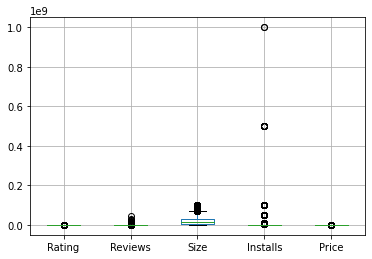

In [ ]:
ply.boxplot();

Category and Rating

In [28]:
ply['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [29]:
ply[ply['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can see Category have wrong value i.e. 1.9 and rating have outlier.So it should be removed.

In [30]:
ply.drop([10472],inplace=True)

In [31]:
ply['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [32]:
ply['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [33]:
ply['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [34]:
ply['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Size, Installs and Price

In [36]:
ply['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', nan, '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M',
       '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M',
       '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M',
       '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M',
       '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k',
       

In [119]:
ply['Size'] = ply.Size.replace('+','')
ply['Size'] = ply.Size.replace(',', '')
ply['Size'] = ply.Size.replace('Varies with device', np.NaN)
ply['Size'] = ply.Size.replace("M","000000")
ply['Size'] = ply.Size.replace("k","000")
ply['Size'] = pd.to_numeric(ply['Size']) 
ply.dropna(subset = ['Size'], inplace=True)



In [55]:
ply['Price'] = ply.Price.replace("Everyone",np.nan)
ply['Price'] = ply.Price.str.replace("$","").astype(float)
ply['Price'].dtype


dtype('float64')

In [57]:
ply['Installs'] = ply.Installs.replace('+','')
ply['Installs'] = ply.Installs.replace(',', '')
ply['Installs'] = ply['Installs'].astype(float)
ply['Installs'].dtype


dtype('float64')

In [46]:
ply['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

Reviews

In [58]:
ply['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [59]:
ply['Reviews'] = ply.Reviews.replace("0.0",0)
ply['Reviews'] = ply.Reviews.replace("3.0M",3000000.0)
ply['Reviews'] = ply['Reviews'].astype(float)
ply['Reviews'].dtype

dtype('float64')

In [60]:
ply['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [61]:
ply['Last Updated'] = pd.to_datetime(ply['Last Updated'])
ply['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10835   2016-09-29
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10840   2018-07-25
Name: Last Updated, Length: 9145, dtype: datetime64[ns]

In [63]:
print("Number of Unique App names = ", len(ply['App'].unique()))
print("NUMBER of the Total App name = ", ply.shape[0])
print("Duplicate Apps = ",len(ply['App'])- len(ply['App'].unique()))

Number of Unique App names =  8434
NUMBER of the Total App name =  9145
Duplicate Apps =  711


In [64]:
total = ply.isnull().sum().sort_values(ascending  = False)

In [65]:
ply.drop_duplicates(subset = 'App', keep = 'first' ,inplace = True)

In [66]:
ply.dropna(how = 'any',inplace  =True)

In [67]:
ply.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [68]:
total1 = usr.isnull().sum().sort_values(ascending  = False)

In [69]:
usr.dropna(how='any',inplace=True)


In [70]:
usr.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Problem 1:which category section has more apps?

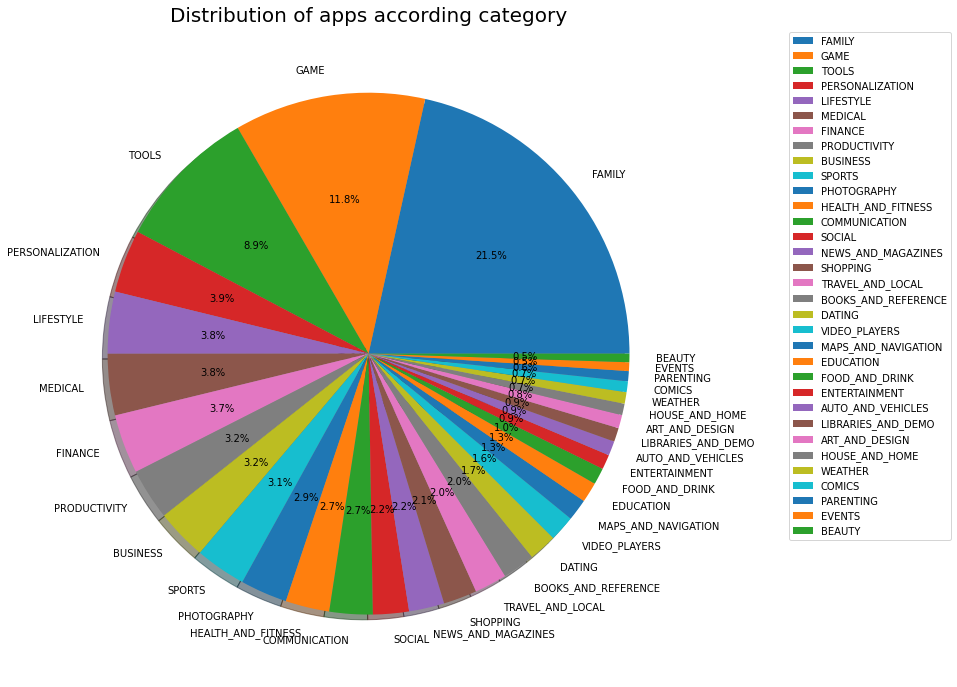

In [71]:
temp = ply['Category'].value_counts().reset_index()
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['Category'], labels= temp['index'],autopct= '%1.1f%%',shadow=True)
plt.legend()
plt.title('Distribution of apps according category',size = 20);
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

Problem 2:Which content rating has more app?

In [72]:
a = ply['Content Rating'].value_counts().index
b = ply['Content Rating'].value_counts()

asis = []
bsis = []
for i in range(len(a)):
    asis.append(a[i])
    bsis.append(b[i])

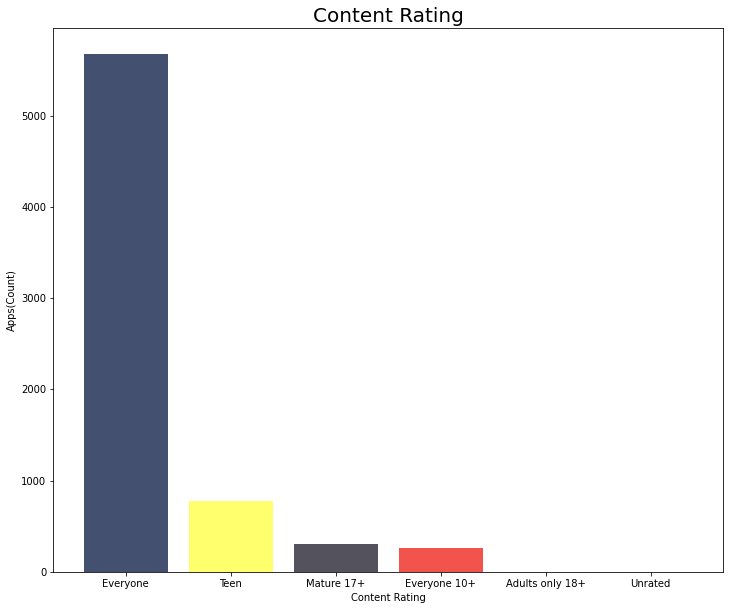

In [73]:
plt.figure(figsize=(12,10))
plt.bar(asis,bsis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

Problem 3: Rating analysis

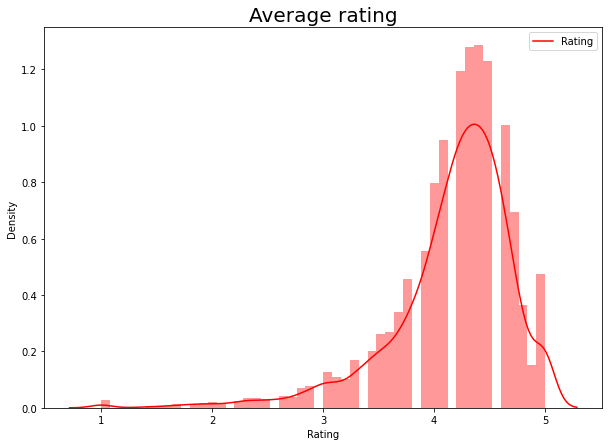

In [74]:
plt.figure(figsize=(10,7))
sns.distplot(ply['Rating'],color = 'red')
plt.legend(['Rating'])
plt.title('Average rating',size = 20)
plt.show()

problem 4

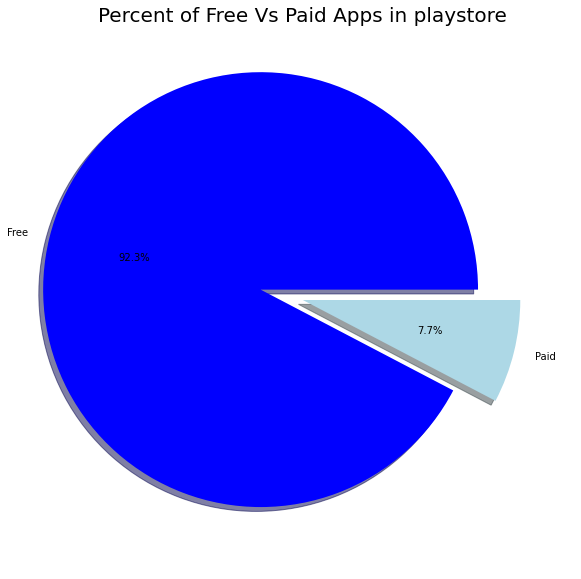

In [75]:
plt.figure(figsize=(10,10))
labels = ply['Type'].value_counts(sort = True).index
sizes = ply['Type'].value_counts(sort = True)
colors = ["blue","lightblue"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in playstore',size = 20)
plt.show()

# Problem Which category apps has 

In [76]:
highest_Installs_ply =ply.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

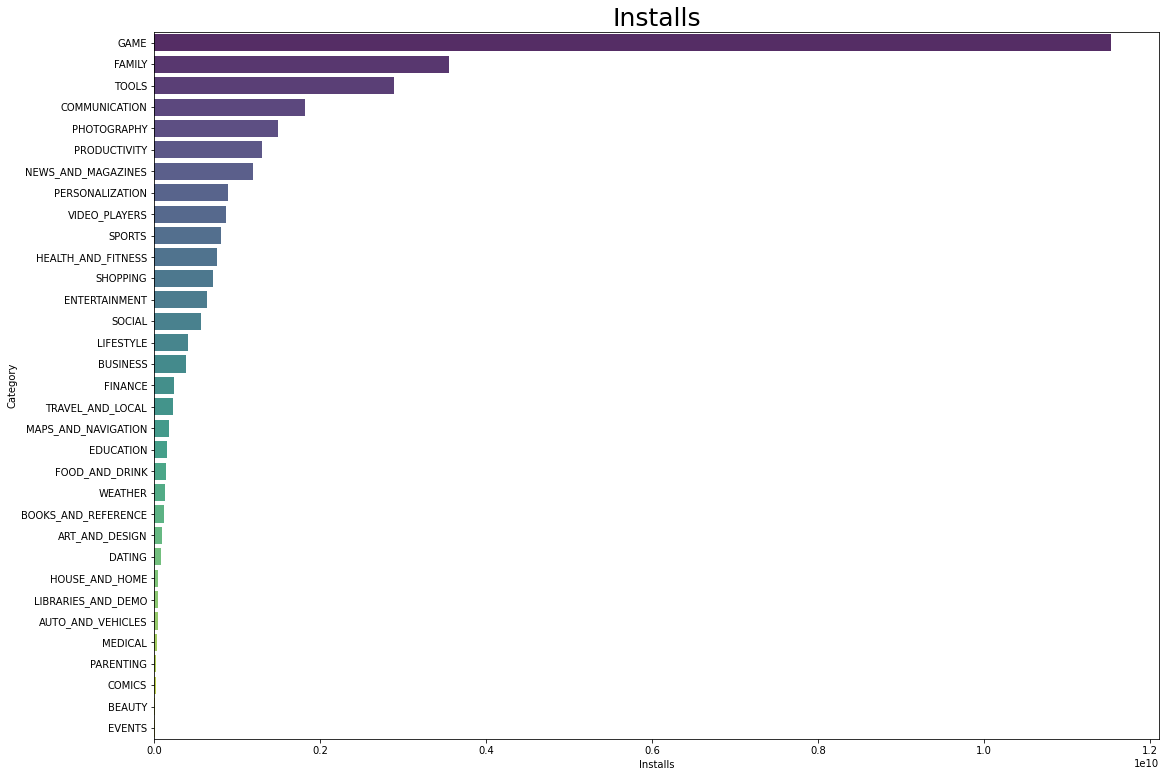

In [77]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_ply)):
    x2sis.append(highest_Installs_ply.Installs[i])
    y2sis.append(highest_Installs_ply.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

# problem 6

In [78]:
Apps_with_Highest_rev = ply.sort_values(by='Reviews', ascending=False).head(20)

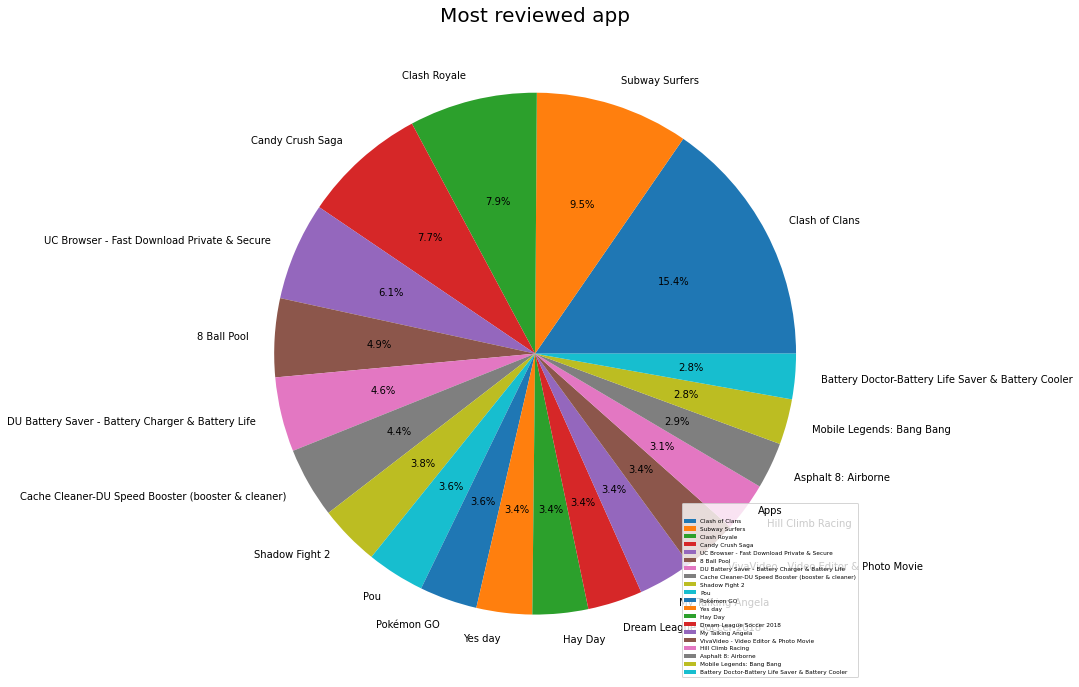

In [79]:
plt.figure(figsize=(15,12));
plt.pie(Apps_with_Highest_rev .Reviews, explode=None, labels=Apps_with_Highest_rev.App, autopct='%1.1f%%', startangle=0);
plt.title('Most reviewed app',size = 20);
plt.legend(Apps_with_Highest_rev.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );


list of problems
1.category

Problem 1:which category section has more apps

problem 2:which content app is most rated


Problem 3: Rating analysiss/
problem 4:free v paid apps
problem 5:most installs
problem 6:most reviewed app

problem 7:Top 5 paid apps

In [80]:
most_paid_app = ply.sort_values(by='Price', ascending=False).head(5)
most_paid_app


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000.0,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000.0,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000.0,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up


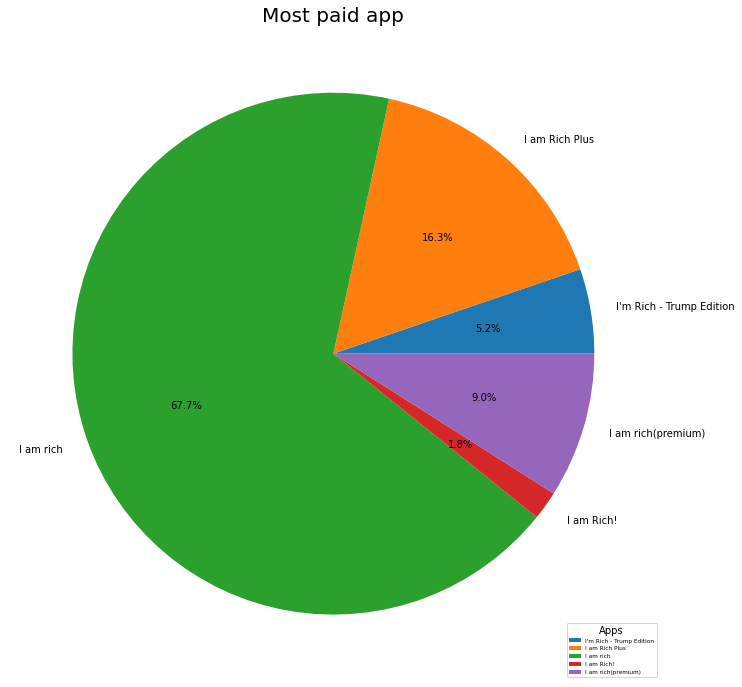

In [81]:
plt.figure(figsize=(15,12));
plt.pie(most_paid_app .Reviews, explode=None, labels=most_paid_app.App, autopct='%1.1f%%', startangle=0);
plt.title('Most paid app',size = 20);
plt.legend(most_paid_app.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

# **problem 8**

In [82]:
most_paid_cat_ply =ply.groupby('Category')[['Price']].count().sort_values(by='Price', ascending=False).head(5)
most_paid_cat_ply

,Price
Category,
FAMILY,1511
GAME,832
TOOLS,626
PERSONALIZATION,274
LIFESTYLE,269


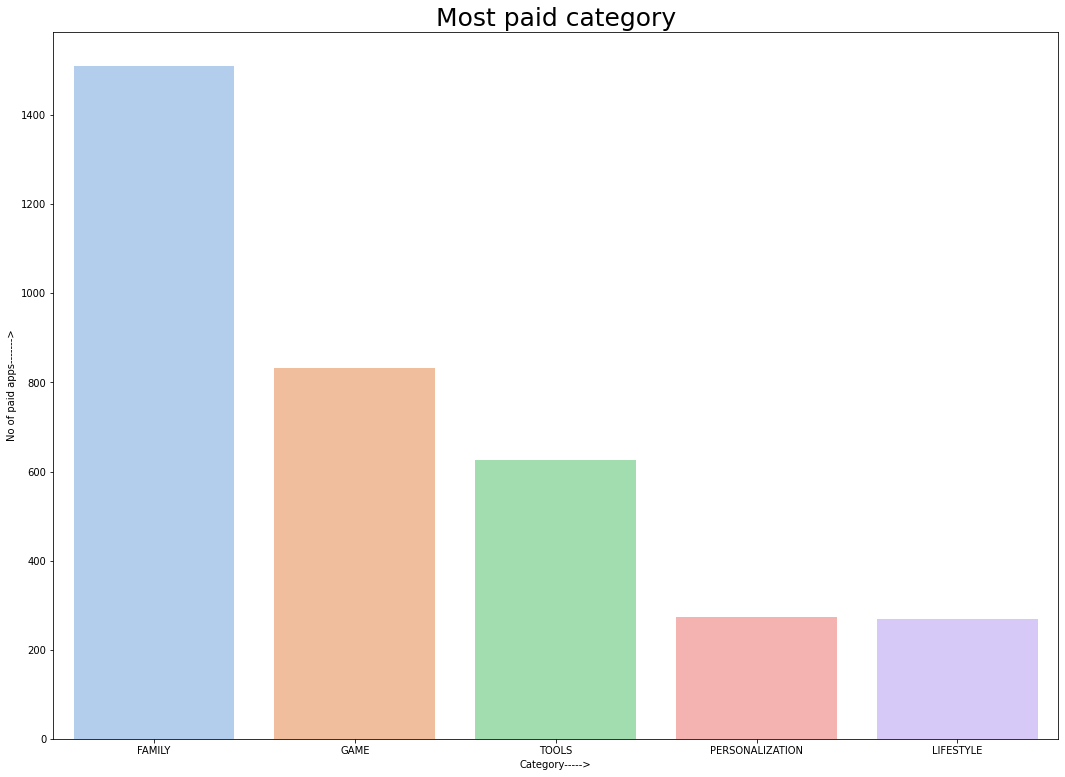

In [83]:
x2sis = []
y2sis = []

for i in range(len(most_paid_cat_ply)):
    x2sis.append(most_paid_cat_ply.index[i])
    y2sis.append(most_paid_cat_ply.Price[i])

plt.figure(figsize=(18,13))

plt.xlabel("Category----->")
plt.ylabel("No of paid apps------->")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "pastel")
graph.set_title("Most paid category", fontsize = 25);

# problem 9

In [84]:
merged_df = ply.merge(usr, on="App")

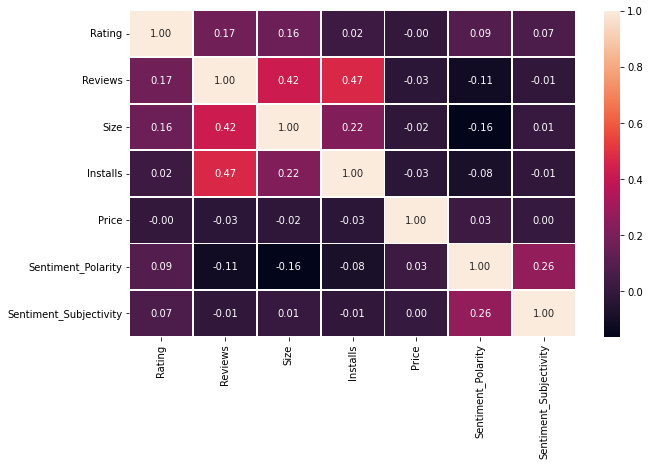

In [85]:
f,ax = plt.subplots(figsize=(10,6))
sns.heatmap(merged_df.corr(), annot=True, linewidths=.8, fmt= '.2f',ax=ax)
plt.show()

Problem 10:percentage of positive, negative and nuetral review on a app

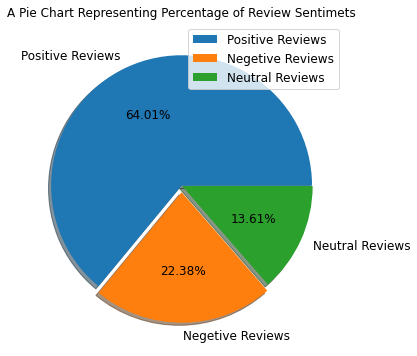

In [102]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=12)
plt.axis('off')
plt.legend()
plt.show()

#problem 11  Which app has more positive review?

In [88]:
most_positive_app_usr =usr.groupby("Sentiment")[["App"]].count().sort_values(by='App', ascending=False).head(5)
most_positive_app_usr

,App
Sentiment,
Positive,23998
Negative,8271
Neutral,5158


Problem 12:Most words used in review section by users

<class 'wordcloud.wordcloud.WordCloud'>


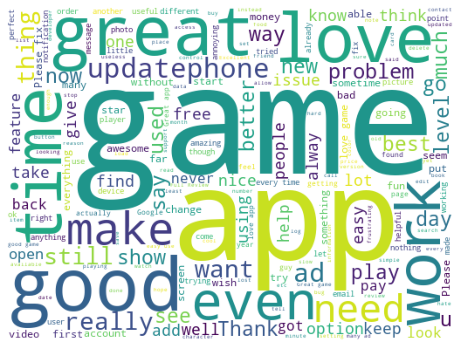

In [100]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(usr['Translated_Review']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

problem 13

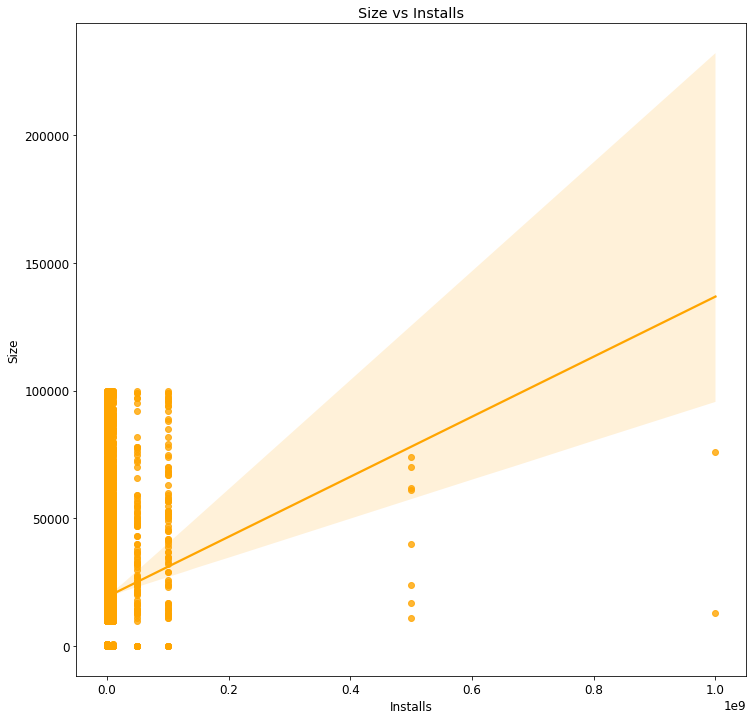

In [108]:
plt.figure(figsize=(12,12))
sns.regplot(y=ply['Size'],x=ply['Installs'],color='orange')
plt.title('Size vs Installs')
plt.show()

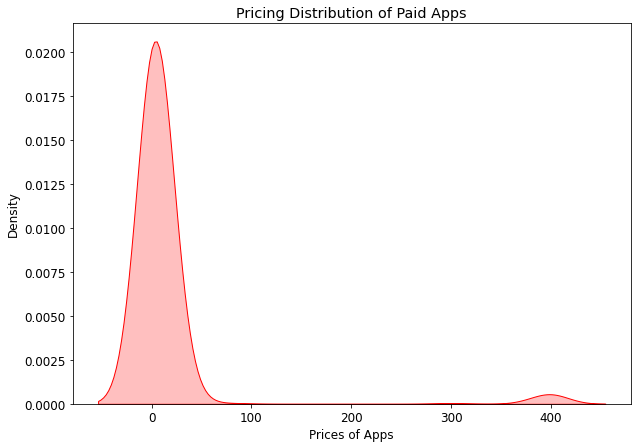

In [109]:
plt.figure(figsize=(10,7))
sns.kdeplot(ply[ply['Type'] == 'Paid']['Price'], color = 'red', shade = True)
plt.xlabel('Prices of Apps')
plt.title('Pricing Distribution of Paid Apps')
plt.show()

In [116]:
def size_apps(x):
  '''
  This function groups the size of an app 
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if x< 1:
      return 'Below 1'
    elif x >= 1 and x <10:
      return '1-10'
    elif x >= 10 and x <20:
      return '10-20'
    elif x >= 20 and x <30:
      return '20-30'
    elif x >= 30 and x <40:
      return '30-40'
    elif x >= 40 and x <50:
      return '40-50'
    elif x >= 50 and x <60:
      return '50-60'
    elif x >= 60 and x <70:
      return '60-70'
    elif x >= 70 and x <80:
      return '70-80'
    elif x >= 80 and x <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return x

In [120]:
ply['size_group']=ply['Size'].apply(lambda x : size_apps(x))

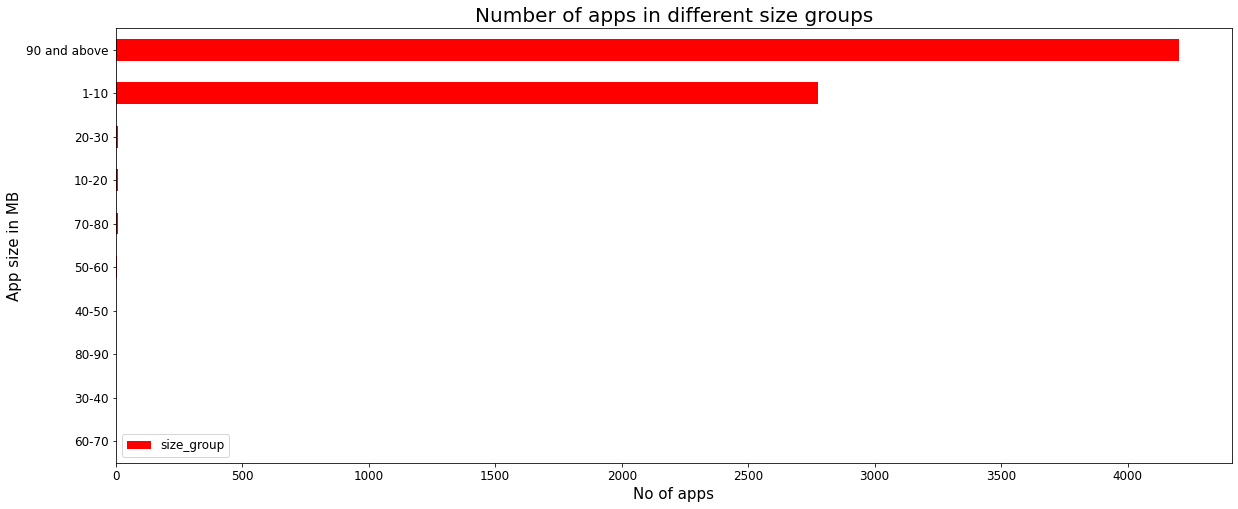

In [121]:
ply['size_group'].value_counts().plot.barh(figsize=(20,8),color='r').invert_yaxis()
plt.title("Number of apps in different size groups", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('No of apps', size=15)
plt.legend()

In [114]:
ply['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 5.50e+00, 1.70e+04, 3.90e+04, 3.10e+04,
       4.20e+00, 2.30e+04, 6.00e+00, 6.10e+00, 4.60e+00, 9.20e+00,
       5.20e+00, 1.10e+04, 2.40e+04, 9.40e+00, 1.50e+04, 1.00e+04,
       1.20e+00, 2.60e+04, 8.00e+00, 7.90e+00, 5.60e+04, 5.70e+04,
       3.50e+04, 5.40e+04, 2.01e+02, 3.60e+00, 5.70e+00, 8.60e+00,
       2.40e+00, 2.70e+04, 2.70e+00, 2.50e+00, 7.00e+00, 1.60e+04,
       3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04, 3.20e+04,
       5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00, 9.80e+00,
       5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00, 7.10e+00,
       2.20e+04, 6.40e+00, 3.20e+00, 8.20e+00, 4.90e+00, 9.50e+00,
       5.00e+00, 5.90e+00, 1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00,
       4.00e+00, 2.30e+00, 2.10e+00, 4.20e+04, 9.10e+00, 5.50e+04,
       2.30e+01, 7.30e+00, 6.50e+00, 1.50e+00, 7.50e+00, 5.10e